In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chemparse as cp

#no dado original, havia uma coluna sem nome (com os indexes). seria difícil remover assim. Nomeei-a de "A", para priorizar 
#o index do pandas.

# Função para normalizar todas as colunas de um dataframe pelo método de valor mínimo 0 e máximo 1
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado


In [2]:
#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")
df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)
df_chem = df.reindex(df.columns[[0, 1, 2, 3,4,5,6,135,136,137]], axis=1)
df_chem.shape
#print(df_chem)

# Normalização do DataFrame
df2 = normalizar(df_chem)
df_tratado = df2.dropna(axis = 1)
df_tratado

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Molar Mass,Molar Volume,Calculated Density
0,0.833333,0.473684,0.000000,0.337746,0.75,0.467041,0.0,0.057323,0.057586,0.389835
1,0.666667,0.289474,1.000000,0.359220,0.75,0.470588,0.0,0.030480,0.023090,0.457480
2,0.833333,0.210526,1.000000,0.460753,0.75,0.616317,0.0,0.064609,0.057197,0.442743
3,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.038552,0.011597,0.969592
4,0.333333,0.578947,0.666667,0.109455,1.00,0.483003,0.0,0.060402,0.051786,0.453095
...,...,...,...,...,...,...,...,...,...,...
3107,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.047475,0.028843,0.594781
3108,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.070548,0.137955,0.208756
3109,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.072792,0.086328,0.339587
3110,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.015775,0.023056,0.234994


In [3]:
#relação de Pearson
def Pearson(DataFrame):
    data = DataFrame
    data.shape
    corrmat = data.corr()
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(corrmat, ax = ax, cmap ="RdYlBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)

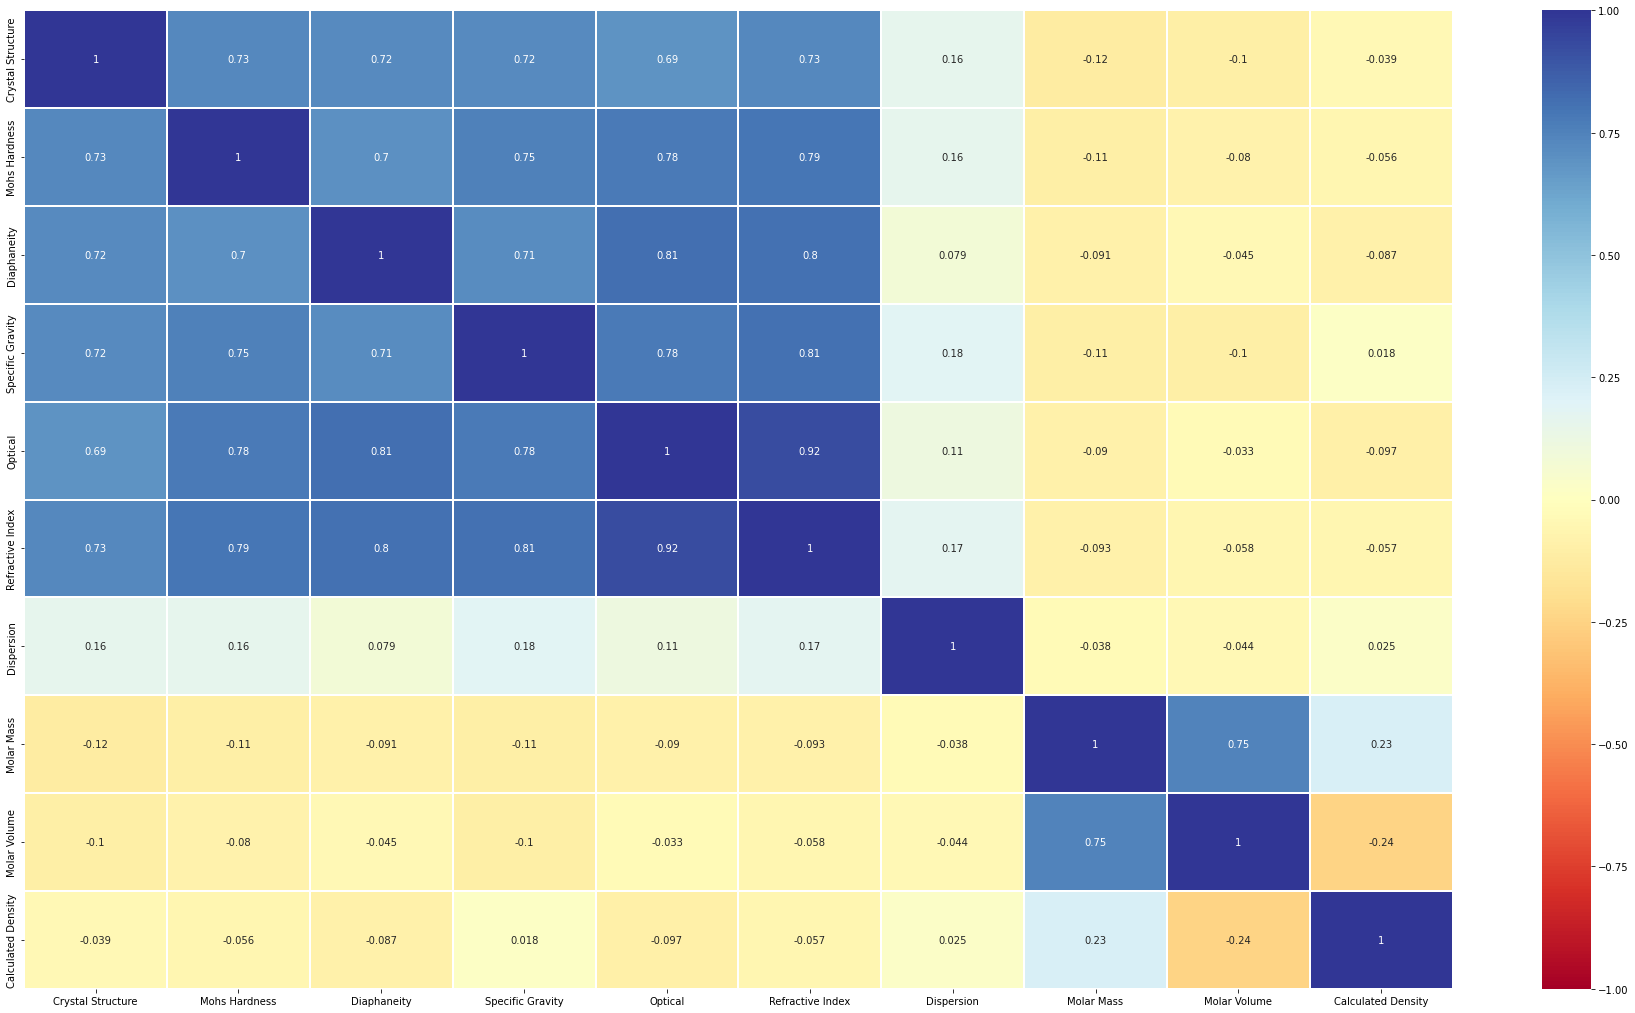

In [4]:
Pearson(df_tratado)

In [5]:
#correlação de Spearman
import numpy as np
from scipy.stats import spearmanr #x e y
def Spearman(DataFrame, tam_matrizx,tam_matrizy):
    matriz = np.zeros((tam_matrizx,tam_matrizy))
#spearmat = pd.DataFrame(a,columns=df_chem.columns)
#print(a)
    for i in range(0,tam_matrizx):
        for j in range(0,tam_matrizy):
            if i >= j:
                x = DataFrame.iloc[:,i]
                y = DataFrame.iloc[:,j]
            
                dados_tratados = spearmanr(x,y)[0]
            #print(b)
                matriz[i,j] = dados_tratados
                matriz[j,i] = dados_tratados
            
    spearmat = pd.DataFrame(matriz,columns=DataFrame.columns, index=DataFrame.columns)            
    f, ax = plt.subplots(figsize =(32, 18))
    sns.heatmap(spearmat, ax = ax, cmap ="RdBu", linewidths = 0.1, vmin=-1, vmax=1, annot=True)


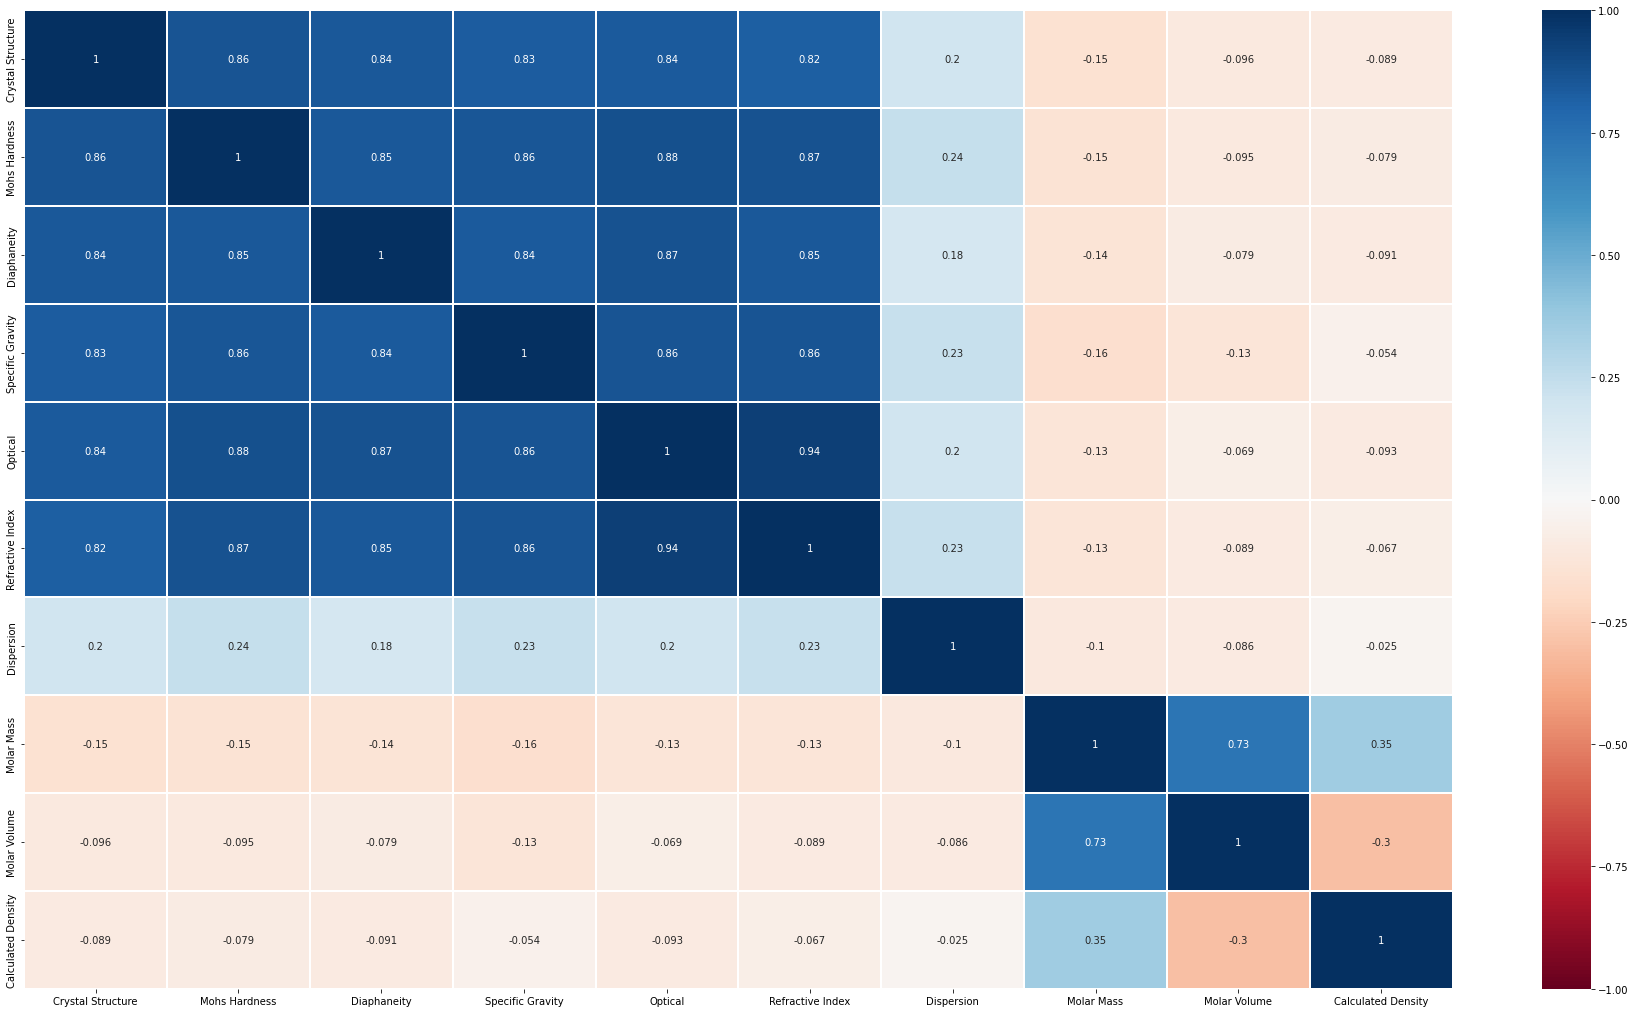

In [6]:
Spearman(df_tratado,10,10)

In [7]:
#df_tratado.cov()

<AxesSubplot:xlabel='Crystal Structure', ylabel='Mohs Hardness'>

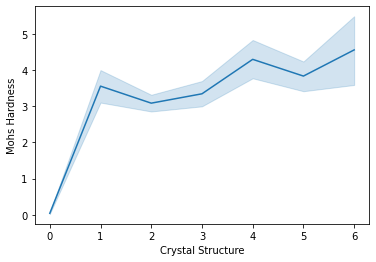

In [13]:
sns.lineplot(data = df_chem,x='Crystal Structure',y='Mohs Hardness')

<AxesSubplot:xlabel='Refractive Index', ylabel='Optical'>

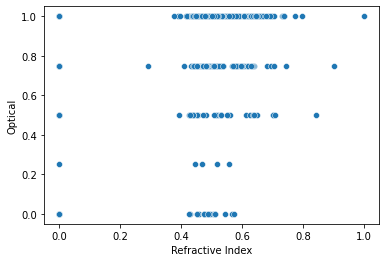

In [9]:
sns.scatterplot(data = df_tratado,x = 'Refractive Index',y = 'Optical')

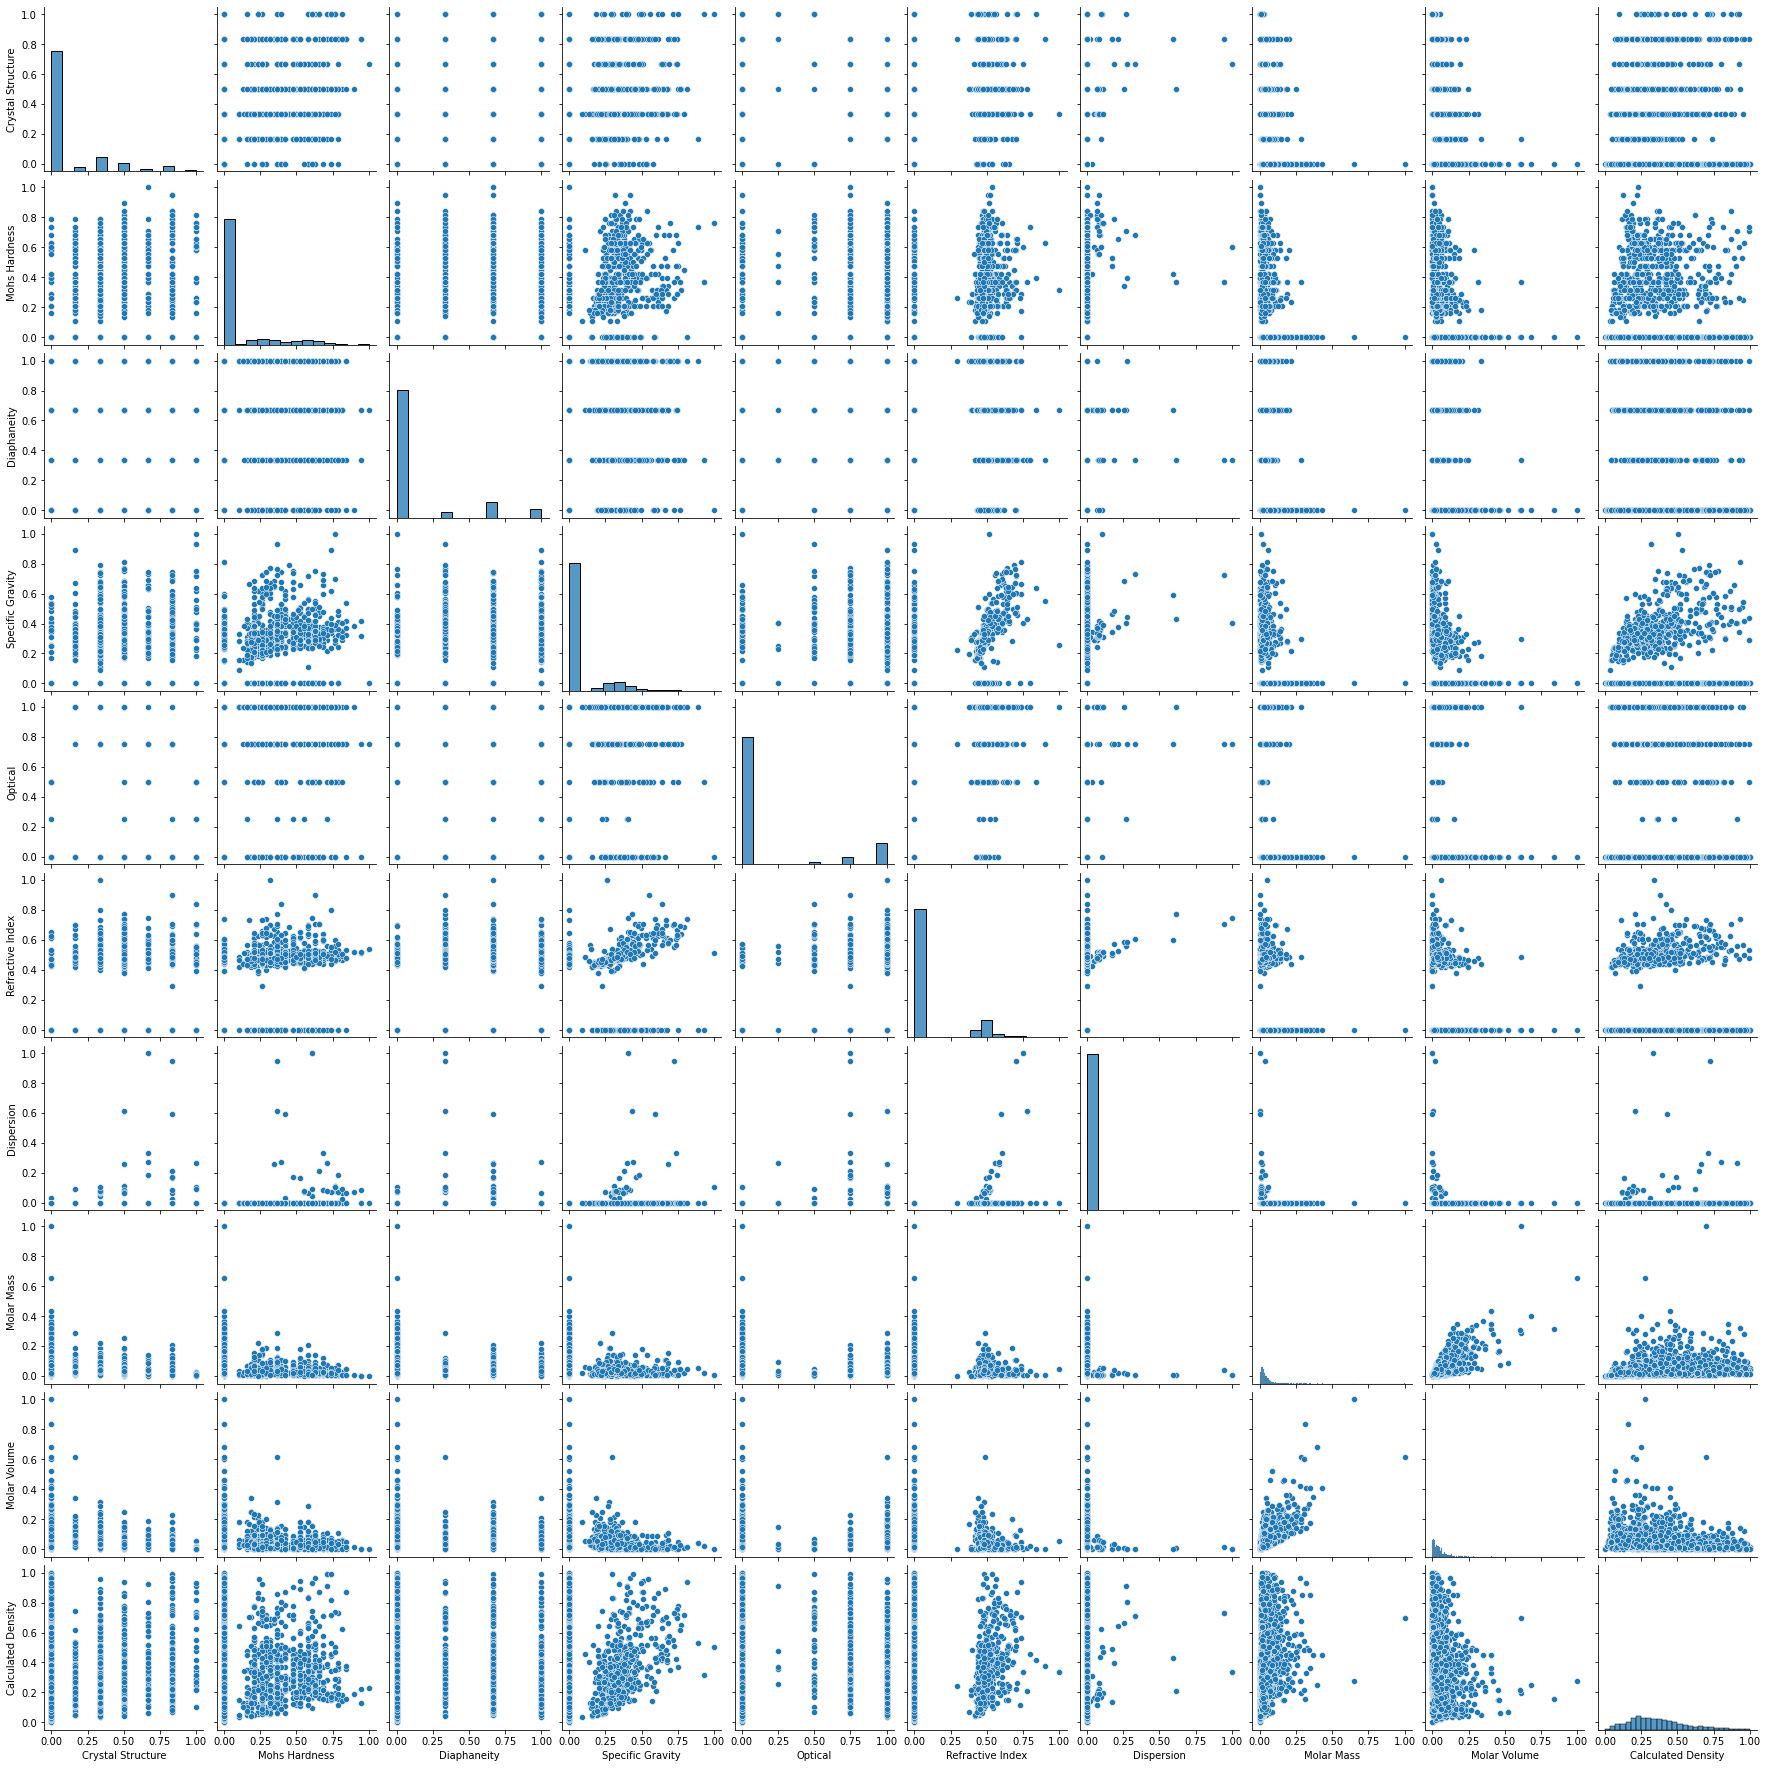

In [10]:
sns.pairplot(data = df_tratado)

<AxesSubplot:xlabel='Calculated Density', ylabel='Molar Mass'>

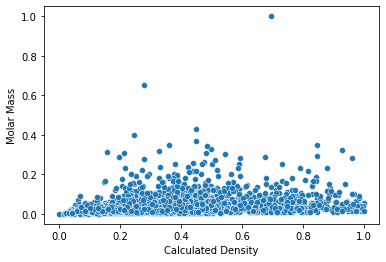

In [11]:
sns.scatterplot(data = df_tratado, x='Calculated Density', y = 'Molar Mass')